In [11]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, num_iterations=1000, plot=False):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = np.random.randn(2, 1)  # Initialize weights and bias randomly
        self.plot = plot
        if self.plot:
            self.fig, self.ax = plt.subplots()
            self.colormap = plt.colormaps['RdYlGn']

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        return X_b.dot(self.weights)
    
    def compute_cost(self, X, y):
        m = len(y)
        predictions = self.predict(X)
        cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
        return cost
    
    def fit(self, X, y, X_test=None, y_test=None):
        m = len(y)
        X_b = np.c_[np.ones((m, 1)), X]  # Add column of ones for bias (intercept) term
        
        if self.plot:
            self.ax.scatter(X, y, color='blue', label='Training data')
            if X_test is not None and y_test is not None:
                self.ax.scatter(X_test, y_test, color='orange', label='Test data', alpha=0.5)
        
        for i in range(self.num_iterations):
            predictions = self.predict(X)
            # errors = predictions - y
            # gradients = (1 / m) * X_b.T.dot(errors)
            # self.weights -= self.learning_rate * gradients
            
            if i % (self.num_iterations // 10) == 0:  # Plot the line after every 10% of iterations
                print(f"Iteration {i}: Cost {self.compute_cost(X, y)}")
                if self.plot:
                    color = self.colormap(i / self.num_iterations)
                    self.ax.plot(X, predictions, color=color, label=f'Iteration {i}' if i == 0 else "")
        
        if self.plot:
            self.ax.set_xlabel('Input Feature X')
            self.ax.set_ylabel('Output y')
            self.ax.set_title('Linear Regression Training Progress')
            self.ax.legend()
            plt.show()

    def compute_mse(self, X_test, y_test):
        predictions = self.predict(X_test)
        mse = np.mean((predictions - y_test) ** 2)
        return mse

ValueError: shapes (100,2) and (100,1) not aligned: 2 (dim 1) != 100 (dim 0)

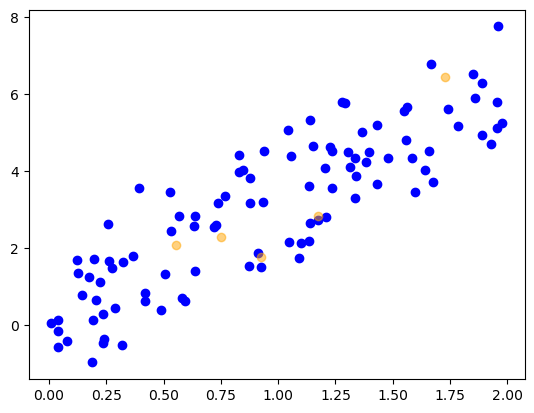

In [12]:
# create test data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 3 * X + np.random.randn(100, 1)

model = LinearRegressionGD(learning_rate=0.05, num_iterations=10, plot=True)
X_test = 2 * np.random.rand(5, 1)
y_test = 3 * X_test + np.random.randn(5, 1)

model.fit(X, y, X_test, y_test)
print("MSE on test data:", model.compute_mse(X_test, y_test))
